# Community Detection Example (Graph Analysis)
Here is demonstrated how to use the LabelPropagation module from the `rice_ml` library to find community structure in network data.\
In this example, a simple, synthetic, and weighted adjacency matrix representing a small social network will be used to train and evaluate the model.\
**Goal: Identify the natural grouping (communities) of nodes within the network based on the strength of their connections.

In [1]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
from rice_ml.unsupervised_learning.community_detection import LabelPropagation

## 1. Create the Graph Data (Adjacency Matrix)
Create a synthetic $10 \times 10$ weighted adjacency matrix designed to clearly show two distinct communities (Nodes 0-4 and Nodes 5-9), with strong internal links and weak external links.

In [3]:
N = 10 # Number of nodes
A = np.zeros((N, N))

# Community 1 (Nodes 0-4): Strong internal links (weight 5)
A[0:5, 0:5] = 5 
np.fill_diagonal(A[0:5, 0:5], 0) 

# Community 2 (Nodes 5-9): Strong internal links (weight 5)
A[5:10, 5:10] = 5
np.fill_diagonal(A[5:10, 5:10], 0) 

# Weak inter-community link (e.g., Node 4 connects to Node 5 with weight 1)
A[4, 5] = 1
A[5, 4] = 1 # Matrix must be symmetric for undirected graph

# Ensure symmetry (A[i, j] == A[j, i])
A = np.maximum(A, A.T)

print(f"Adjacency Matrix (10x10):\n{A}")

Adjacency Matrix (10x10):
[[0. 5. 5. 5. 5. 0. 0. 0. 0. 0.]
 [5. 0. 5. 5. 5. 0. 0. 0. 0. 0.]
 [5. 5. 0. 5. 5. 0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5. 0. 0. 0. 0. 0.]
 [5. 5. 5. 5. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 0. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 0. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 0.]]


## 2. Initialize and Run the Model
Initialize the `LabelPropagation` model and fit it using the adjacency matrix. The model will iteratively converge on the community labels.

In [4]:
# Initialize Label Propagation model
lpa = LabelPropagation(
    max_iter = 50, 
    random_state = 67  # Used for tie-breaking and initial order
)

print("\nBeginning Label Propagation...")

# Fit the model to the adjacency matrix
lpa.fit(A)

print("Propagation Complete.")
print(f"Iterations run: {lpa.n_iter_}")
print(f"Number of communities found: {lpa.n_communities_}")


Beginning Label Propagation...
Propagation Complete.
Iterations run: 3
Number of communities found: 2


## 3. Results and Visualization
The final community labels found by the algorithm are stored in the `labels_` attribute. Then, use NetworkX to visualize the graph, coloring nodes based on their discovered community.

C:\Users\erida\AppData\Local\Temp\ipykernel_11628\2632680766.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_labels))


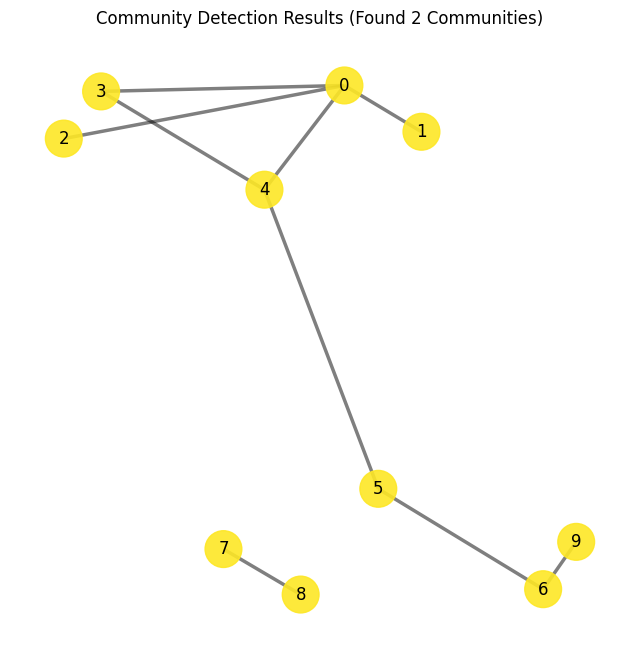


--- Final Community Assignment ---
Node 0: Community 4
Node 1: Community 4
Node 2: Community 4
Node 3: Community 4
Node 4: Community 4
Node 5: Community 7
Node 6: Community 7
Node 7: Community 7
Node 8: Community 7
Node 9: Community 7


In [7]:
# Get the discovered community labels
community_labels = lpa.labels_

# Map labels to a color for visualization
unique_labels = np.unique(community_labels)
cmap = plt.cm.get_cmap('viridis', len(unique_labels))
node_colors = [cmap(label) for label in community_labels]

# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Visualization
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=67) # Layout for consistent positioning

# Draw nodes (colored by community) and edges (weighted by connection strength)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=A[np.triu_indices(N, k=1)] * 0.5, alpha=0.5) 
nx.draw_networkx_labels(G, pos, font_color='black')

plt.title(f"Community Detection Results (Found {lpa.n_communities_} Communities)")
plt.axis('off')
plt.show()

print("\n--- Final Community Assignment ---")
for node_id, label in enumerate(community_labels):
    print(f"Node {node_id}: Community {label}")